# K- NEAREST NEIGHBOURS (CLASSIFICATION)

In [31]:
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


In [2]:
data = pd.read_csv(r'C:\Users\User\juypter\files\Social_Network_Ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

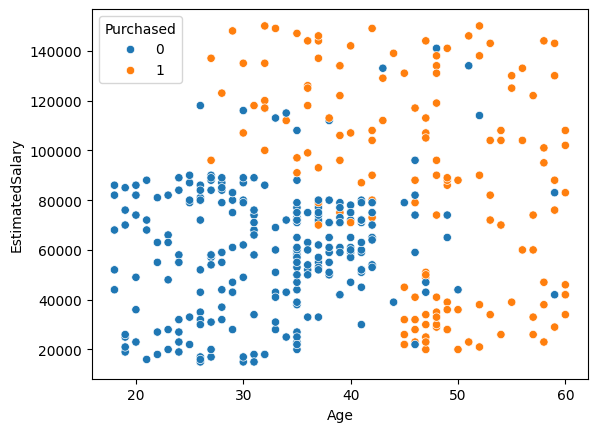

In [10]:
import matplotlib.pyplot as plt
sns.scatterplot(x="Age", y="EstimatedSalary", data=data,hue="Purchased")
plt.show()

In [5]:
x = data.iloc[:,:-1]
x.ndim
y = data["Purchased"]

In [13]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)
x


,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [14]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
knn.score(x_test, y_test)*100,knn.score(x_train, y_train)*100

(91.25, 92.5)

In [26]:
for i in range(1, 30):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train, y_train)
    print(i,knn1.score(x_train,y_train)*100,knn1.score(x_test,y_test)*100)


1 99.6875 86.25
2 91.5625 86.25
3 92.5 91.25
4 91.875 92.5
5 90.9375 92.5
6 90.9375 90.0
7 91.875 93.75
8 90.625 92.5
9 91.25 93.75
10 90.625 92.5
11 90.9375 92.5
12 91.25 92.5
13 91.5625 92.5
14 90.625 92.5
15 90.625 92.5
16 90.0 92.5
17 90.625 92.5
18 90.3125 92.5
19 90.9375 92.5
20 90.0 93.75
21 90.3125 92.5
22 90.0 93.75
23 90.3125 93.75
24 89.375 93.75
25 90.0 93.75
26 89.375 93.75
27 89.375 92.5
28 88.75 93.75
29 88.75 93.75


In [29]:
knn.predict([[-1.781797,-1.490046]])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [30]:
knn.predict([[1.083596,-0.990844]])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


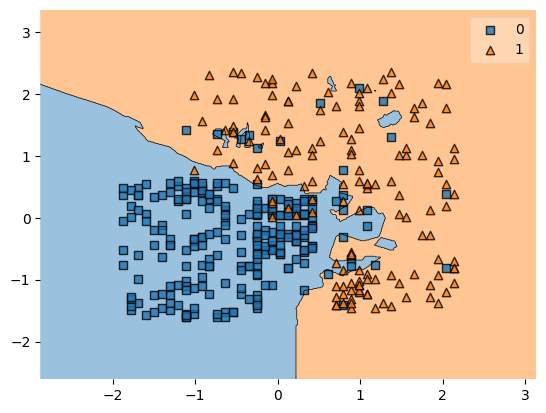

In [32]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn)
plt.show()